In [209]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image


In [210]:

train_dir = 'deep-learning-datasets/chihuahua-muffin/train/'
test_dir = 'deep-learning-datasets/chihuahua-muffin/test/'

images = []
labels = []
def load(dir):
    files = os.listdir(dir)
    for file in files:
        if 'jpg' in file or 'jpeg' in file:
            img = Image.open(dir+file)
            w,h = img.size
            if w != h:
                m_min = min(w,h)
                img = img.crop([0,0,m_min, m_min])
            img.thumbnail((100,100), Image.ANTIALIAS)
            img = np.asarray(img)
            images.append(img)
            if 'chihuahua' in file:
                labels.append(0)
            if 'muffin' in file:
                labels.append(1)
    return (np.asarray(images), np.asarray(labels))


In [211]:
(test_images, test_labels) = load(test_dir)
(train_images, train_labels) = load(train_dir)

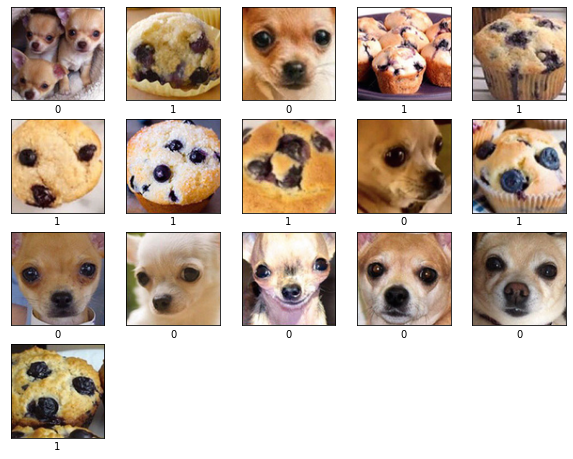

In [212]:
plt.figure(figsize=(10,10))
grid_size = 16
for i in range(grid_size):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])

In [213]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100,100, 3)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [214]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.7, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [215]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 321ms/step - loss: 1.1060 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.8576 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.8488 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7606 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7350 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7213 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7119 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7021 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6891 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6807 - accuracy: 0.5000
Epoch 11/100
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 0.6202 - accuracy: 0.8750
Epoch 84/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6195 - accuracy: 0.8750
Epoch 85/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6189 - accuracy: 0.8750
Epoch 86/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6183 - accuracy: 0.8750
Epoch 87/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6176 - accuracy: 0.8750
Epoch 88/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6170 - accuracy: 0.8750
Epoch 89/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6164 - accuracy: 0.8750
Epoch 90/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6157 - accuracy: 0.8750
Epoch 91/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6151 - accuracy: 0.8750
Epoch 92/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6144 - accuracy: 0.8750
Epoch 93/100
1/1 [=====

In [216]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

1/1 [==============================] - 0s 100ms/step - loss: 0.6084 - accuracy: 0.7500
0.75


In [217]:
predict = model.predict(test_images)
print(predict)

[[0.49585873 0.50414133]
 [0.45071056 0.54928946]
 [0.53210366 0.46789628]
 [0.3947452  0.6052548 ]]


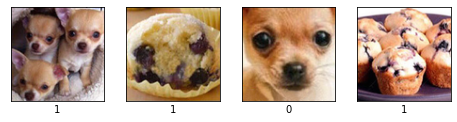

In [218]:
plt.figure(figsize=(10,10))
grid_size = 4
for i in range(grid_size):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.xlabel(np.argmax(predict[i], axis=0))

In [219]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(100,100, 3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [220]:
_model = keras.Sequential([
    data_augmentation,
    keras.layers.Flatten(input_shape=(100,100)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [221]:

_model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
_model.fit(train_images, train_labels, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 635ms/step - loss: 1.1169 - accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 38ms/step - loss: 0.9507 - accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 29ms/step - loss: 0.8799 - accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 24ms/step - loss: 0.8225 - accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 41ms/step - loss: 0.8090 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 35ms/step - loss: 0.7859 - accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 33ms/step - loss: 0.7607 - accuracy: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 27ms/step - loss: 0.7405 - accuracy: 0.5000
Epoch 9/200
1/1 [==============================] - 0s 26ms/step - loss: 0.7340 - accuracy: 0.5000
Epoch 10/200
1/1 [==============================] - 0s 25ms/step - loss: 0.7180 - accuracy: 0.5000
Epoch 11/200
1/1 [

1/1 [==============================] - 0s 25ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 84/200
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 85/200
1/1 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 86/200
1/1 [==============================] - 0s 30ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 87/200
1/1 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 88/200
1/1 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 89/200
1/1 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 90/200
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 91/200
1/1 [==============================] - 0s 29ms/step - loss: 0.6948 - accuracy: 0.4375
Epoch 92/200
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 93/200
1/1 [=====

1/1 [==============================] - 0s 26ms/step - loss: 0.6944 - accuracy: 0.4375
Epoch 165/200
1/1 [==============================] - 0s 26ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 166/200
1/1 [==============================] - 0s 29ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 167/200
1/1 [==============================] - 0s 32ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 168/200
1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 169/200
1/1 [==============================] - 0s 29ms/step - loss: 0.6944 - accuracy: 0.4375
Epoch 170/200
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 171/200
1/1 [==============================] - 0s 29ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 172/200
1/1 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 173/200
1/1 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 174/200


In [222]:
test_loss, test_acc = _model.evaluate(test_images, test_labels)
print(test_acc)

1/1 [==============================] - 0s 92ms/step - loss: 0.6931 - accuracy: 0.5000
0.5


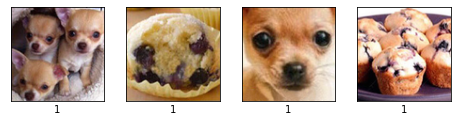

In [232]:
predict = _model.predict(test_images)
plt.figure(figsize=(10,10))
grid_size = 4
for i in range(grid_size):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.xlabel(np.argmax(predict[i], axis=0))

In [233]:
from tensorflow.keras import layers
tf_model = keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(100, 100, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])

In [234]:
tf_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [235]:
tf_model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 576ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 111ms/step - loss: 0.6896 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 135ms/step - loss: 0.6582 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 139ms/step - loss: 0.5711 - accuracy: 0.8125
Epoch 5/20
1/1 [==============================] - 0s 120ms/step - loss: 0.5031 - accuracy: 0.8750
Epoch 6/20
1/1 [==============================] - 0s 124ms/step - loss: 0.4458 - accuracy: 0.8750
Epoch 7/20
1/1 [==============================] - 0s 125ms/step - loss: 0.3523 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 128ms/step - loss: 0.2937 - accuracy: 0.9375
Epoch 9/20
1/1 [==============================] - 0s 111ms/step - loss: 0.2133 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 118ms/step - loss: 0.1706 - accuracy: 0.9375
Epoch 11/20
1/1 [==

In [236]:
test_loss, test_acc = tf_model.evaluate(test_images, test_labels)
print(test_acc)

1/1 [==============================] - 0s 133ms/step - loss: 0.0013 - accuracy: 1.0000
1.0


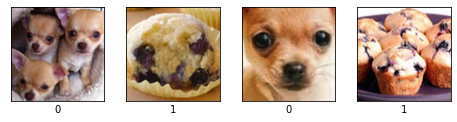

In [237]:
predict = tf_model.predict(test_images)
plt.figure(figsize=(10,10))
grid_size = 4
for i in range(grid_size):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.xlabel(np.argmax(predict[i], axis=0))

In [243]:
data_aug_model = model = keras.Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])

In [244]:
data_aug_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [245]:
data_aug_model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6906 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 125ms/step - loss: 0.6633 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 147ms/step - loss: 0.6682 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 147ms/step - loss: 0.5903 - accuracy: 0.5625
Epoch 5/20
1/1 [==============================] - 0s 146ms/step - loss: 0.5975 - accuracy: 0.6875
Epoch 6/20
1/1 [==============================] - 0s 139ms/step - loss: 0.5441 - accuracy: 0.8125
Epoch 7/20
1/1 [==============================] - 0s 236ms/step - loss: 0.4865 - accuracy: 0.8750
Epoch 8/20
1/1 [==============================] - 0s 149ms/step - loss: 0.4430 - accuracy: 0.7500
Epoch 9/20
1/1 [==============================] - 0s 138ms/step - loss: 0.4381 - accuracy: 0.8125
Epoch 10/20
1/1 [==============================] - 0s 239ms/step - loss: 0.3097 - accuracy: 0.9375
Epoch 11/20
1/1 [=====

In [247]:
test_loss, test_acc = data_aug_model.evaluate(test_images, test_labels)
print(test_acc)

1/1 [==============================] - 0s 132ms/step - loss: 0.0693 - accuracy: 1.0000
1.0


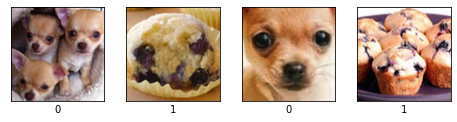

In [249]:
predict = data_aug_model.predict(test_images)
plt.figure(figsize=(10,10))
grid_size = 4
for i in range(grid_size):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.xlabel(np.argmax(predict[i], axis=0))